In [2]:
import matplotlib.pyplot as plt
from scraper import Line
import wandb

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

In [2]:
# Hairpin
api = wandb.Api()
sweep = api.sweep("mjsargent/SRTabular/td8fzfg4")
#no_curiosity.plot_line(label="A2C", color="#5FC6DB")
#curiosity.plot_line(label="MSE", color="#338B4E")
#AMA.plot_line(label="AMA", color="#95275F")
#RND.plot_line(label="RND", color="#5882FA")
#disagreement.plot_line(label="Ensemble", color="#FE9A2E")

run_names_tsr = []
run_names_sr = []
run_names_sq = []
run_names_q = []
run_names_sr_extended = []
for run in sweep.runs:
    if run.config["agent"] == "tsr" and run.config["max_skips"] == 7 and run.config["env"] == "hairpin":
        run_names_tsr.append(run.name)
    if run.config["agent"] == "sr" and run.config["max_skips"] == 7 and run.config["env"] == "hairpin":
        run_names_sr.append(run.name)
    if run.config["agent"] == "sq" and run.config["max_skips"] == 7 and run.config["env"] == "hairpin":
        run_names_sq.append(run.name)
    if run.config["agent"] == "q" and run.config["max_skips"] == 7 and run.config["env"] == "hairpin":
        run_names_q.append(run.name) 
    if run.config["agent"] == "sr_extend" and run.config["max_skips"] == 7 and run.config["env"] == "hairpin":
        run_names_sr_extended.append(run.name) 

In [9]:
# Hairpin Hard
api = wandb.Api()
sweep = api.sweep("mjsargent/SRTabular/td8fzfg4")

#no_curiosity.plot_line(label="A2C", color="#5FC6DB")
#curiosity.plot_line(label="MSE", color="#338B4E")
#AMA.plot_line(label="AMA", color="#95275F")
#RND.plot_line(label="RND", color="#5882FA")
#disagreement.plot_line(label="Ensemble", color="#FE9A2E")

run_names_tsr = []
run_names_sr = []
run_names_sq = []
run_names_q = []
run_names_sr_extended = []
for run in sweep.runs:
    last_step = run.history['_step'].values.tolist()[-1]
    if run.history['_step'].values.tolist()[-1] == sweep.config['parameters']['episodes']['values'][0]:
        if run.config["agent"] == "tsr" and run.config["max_skips"] == 7 and run.config["env"] == "hairpinhard":
            run_names_tsr.append(run.name)
        if run.config["agent"] == "sr" and run.config["max_skips"] == 7 and run.config["env"] == "hairpinhard":
            run_names_sr.append(run.name)
        if run.config["agent"] == "sq" and run.config["max_skips"] == 7 and run.config["env"] == "hairpinhard":
            run_names_sq.append(run.name)
        if run.config["agent"] == "q" and run.config["max_skips"] == 7 and run.config["env"] == "hairpinhard":
            run_names_q.append(run.name) 
        if run.config["agent"] == "sr_extend" and run.config["max_skips"] == 7 and run.config["env"] == "hairpinhard":
            run_names_sr_extended.append(run.name) 

TypeError: 'method' object is not subscriptable

In [15]:
for run in sweep.runs:
    last_step = run.history(samples = 100000)['_step'].values.tolist()[-1]
    if last_step < 3000:
    
        print(run.name, last_step)
    

In [4]:

tsr = Line(
    run_names= run_names_tsr,
    x_quantity="_step",
    y_quantity="test_episode_reward:",
    color="#756AD9",
    project="SRTabular",
    entity="mjsargent"
)

In [5]:

sr = Line(
    run_names= run_names_sr,
    x_quantity="_step",
    y_quantity="test_episode_reward:",
    color="#338B4E",
    project="SRTabular",
    entity="mjsargent"
)

In [6]:


sq = Line(
    run_names= run_names_sq,
    x_quantity="_step",
    y_quantity="test_episode_reward:",
    color="#5882FA",
    project="SRTabular",
    entity="mjsargent"
)

In [6]:

run_names_q = run_names_q[0:10]
q = Line(
    run_names= run_names_q,
    x_quantity="_step",
    y_quantity="test_episode_reward:",
    color="#95275F",
    project="SRTabular",
    entity="mjsargent"
)

In [8]:


sr_extended = Line(
    run_names= run_names_sr_extended,
    x_quantity="_step",
    y_quantity="test_episode_reward:",
    color="#FE9A2E",
    project="SRTabular",
    entity="mjsargent"
)

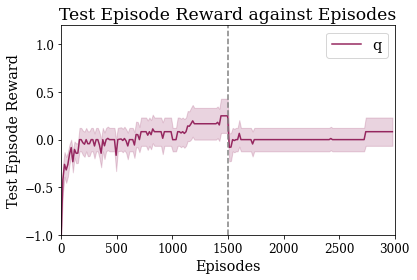

In [7]:
# plot lines


#tsr.plot_line(label="tsr")
#sq.plot_line(label="sq")
#sr.plot_line(label="sr")
q.plot_line(label="q")
#sr_extended.plot_line(label="sr_extended")
# make graph pretty
plt.xlabel("Episodes", fontsize="x-large")
plt.ylabel("Test Episode Reward", fontsize="x-large")
plt.xlim(0,3000)
plt.ylim(-1,1.2)
plt.axvline(x=1500, color='grey', linestyle='--')
plt.title("Test Episode Reward against Episodes", fontsize="xx-large")
plt.tight_layout()
plt.legend(fontsize="x-large", ncol=2)
plt.savefig("./figures/Test_Episode_Reward_HairpinHard_skip_7.png", dpi=1200)
plt.show()